<a href="https://colab.research.google.com/github/cathyriani/miiGAN/blob/main/Atelier_4_Final_V2_colab_gan_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/gan/colab_gan_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Training StyleGAN2 in Google CoLab

Layout your data like this:
* ./data/gan/images - RAW images I wish to train on.
* ./data/gan/datasets - Actual training datasets that I convert from the raw images.
* ./data/gan/experiments - The output from StyleGAN2, my image previews and saved network snapshots.

The drive is mounted to the following location.

```
/content/drive/MyDrive/data
```




#Start Here:

In [ ]:
!nvidia-smi

Mon Apr 25 03:04:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Set Up New Environment

We will mount GDRIVE so that the snapshots are saved there.  Training images must be placed in the same location.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


You must also install NVIDIA StyleGAN2 ADA PyTorch.  We also need to downgrade PyTorch to a version that supports StyleGAN.

In [ ]:
!pip install torch==1.8.1 torchvision==0.9.1
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 17.4 MB 615 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving object

# Find Your Files

The drive is mounted to the following location.

```
/content/drive/MyDrive/data
```

It might be helpful to use an ```ls``` command to establish the exact path for the training images.

In [ ]:
!ls /content/drive/MyDrive/data/gan/images/circuit

'image 100.jpg'  'image 147.jpg'  'image 192.jpg'  'image 66.jpg'
'image 101.jpg'  'image 148.jpg'  'image 193.jpg'  'image 67.jpg'
'image 102.jpg'  'image 149.jpg'  'image 194.jpg'  'image 68.jpg'
'image 103.jpg'  'image 14.jpg'   'image 19.jpg'   'image 69.jpg'
'image 104.jpg'  'image 150.jpg'  'image 20.jpg'   'image 70.jpg'
'image 105.jpg'  'image 151.jpg'  'image 21.jpg'   'image 71.jpg'
'image 106.jpg'  'image 152.jpg'  'image 22.jpg'   'image 72.jpg'
'image 107.jpg'  'image 153.jpg'  'image 23.jpg'   'image 73.jpg'
'image 108.jpg'  'image 154.jpg'  'image 24.jpg'   'image 74.jpg'
'image 109.jpg'  'image 155.jpg'  'image 25.jpg'   'image 75.jpg'
'image 110.jpg'  'image 156.jpg'  'image 26.jpg'   'image 76.jpg'
'image 111.jpg'  'image 157.jpg'  'image 27.jpg'   'image 77.jpg'
'image 112.jpg'  'image 158.jpg'  'image 28.jpg'   'image 78.jpg'
'image 113.jpg'  'image 159.jpg'  'image 29.jpg'   'image 79.jpg'
'image 114.jpg'  'image 15.jpg'   'image 30.jpg'   'image 80.jpg'
'image 115

# Convert Your Images

In [ ]:
!python /content/stylegan2-ada-pytorch/dataset_tool.py --source /content/drive/MyDrive/data/gan/images/circuit --dest /content/drive/MyDrive/data/gan/dataset/circuit

100% 200/200 [00:09<00:00, 22.04it/s]


Delete the circuit directory when resuming training in order to avoid errors.

# Clean Up your Images

It is important that all images have the same dimensions and color depth.  This code can identify images that have issues.

In [ ]:
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/data/gan/images/circuit'
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

base_size = None
for file in tqdm(files):
  file2 = os.path.join(IMAGE_PATH,file)
  img = Image.open(file2)
  sz = img.size
  if base_size and sz!=base_size:
    print(f"Inconsistant size: {file2}")
  elif img.mode!='RGB':
    print(f"Inconsistant color format: {file2}")
  else:
    base_size = sz


  0%|          | 0/200 [00:00<?, ?it/s]

# Perform Initial Training

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/drive/MyDrive/data/gan/images/circuit"
SNAP = 2

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}

In [ ]:
!/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap 25 --resume /content/drive/MyDrive/data/gan/experiments/00007-circuit-auto1/network-snapshot-000500.pkl --outdir /content/drive/MyDrive/data/gan/experiments --data /content/drive/MyDrive/data/gan/dataset/circuit

# Resume Training

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
NETWORK = "network-snapshot-000072.pkl"
RESUME = os.path.join(EXPERIMENTS, "00012-circuit-auto1-resumecustom", NETWORK)
DATA = "/content/drive/MyDrive/data/gan/images/circuit"
SNAP = 2

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 2,
  "network_snapshot_ticks": 2,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/images/circuit",
    "use_labels": false,
    "max_size": 200,
    "xflip": false,
    "resolution": 512
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
  

#Generate Images
To produce images, first, clone StyleGAN2 ADA from GitHub.

In [ ]:
import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    images = G.run(z, label, **G_kwargs) # [minibatch, height, width, channel]
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  #PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'{outdir}/seed{seed:04d}.png')
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

#Load the Correct GAN

In [ ]:
URL = "/content/drive/MyDrive/data/gan/experiments/00010-circuit-auto1-resumecustom/network-snapshot-000096.pkl"
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"

print('Loading networks from "%s"...' % URL)
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

Loading networks from "/content/drive/MyDrive/data/gan/experiments/00010-circuit-auto1-resumecustom/network-snapshot-000096.pkl"...


#Generate and View GANS from Seeds
A GAN is actually created from a 512 number latent vector. However, for now it is easier to just use seeds to build this 512 vector. This code generates images between two seed numbers.

Seed 4000


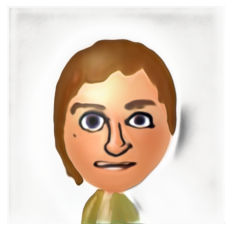

Seed 4001


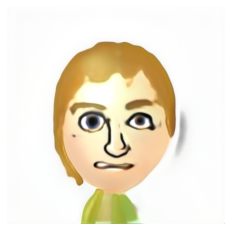

Seed 4002


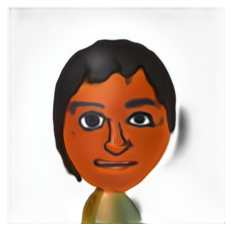

In [ ]:
# Choose your own starting and ending seed.
SEED_FROM = 4000
SEED_TO = 4003

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

This notebook is a modified version of Jeff Heaton's training notebook.

Copyright 2021 by [Jeff Heaton](https://www.youtube.com/channel/UCR1-GEpyOPzT2AO4D_eifdw), [released under Apache 2.0 license](https://github.com/jeffheaton/present/blob/master/LICENSE)